<a href="https://colab.research.google.com/github/Lameeselbakr55/NTI_AI_Projects/blob/master/VGG16_keras_covid19_employ_model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#COVID19 check based on VGG16

##Load Data and Preprocessing

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
import keras 
from keras.models import * 
from keras.layers import * 
from keras.preprocessing import image
import PIL

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255,)
test_datagen = ImageDataGenerator(rescale=1./255)

In [ ]:
train_set = train_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Train/',
      target_size=(224, 224),class_mode='categorical',batch_size=32,shuffle=False)

Found 224 images belonging to 2 classes.


In [ ]:
test_set = test_datagen.flow_from_directory('/content/drive/MyDrive/CovidDataset/Val/',
        target_size=(224, 224),class_mode='categorical',batch_size=32,shuffle=False)

Found 60 images belonging to 2 classes.


## Model Fitting

In [ ]:
from keras.models import load_model

model1=load_model('/content/drive/MyDrive/SavedModels/vgg16_keras_Covid19.h5')

model1.evaluate(test_set)

2/2 [==============================] - 17s 2s/step - loss: 0.6905 - accuracy: 0.9167


[0.6904916167259216, 0.9166666865348816]

In [ ]:
import numpy as np
y_pred=model1.predict(test_set)
y_pred[0:10]

array([[0.5019376 , 0.49806237],
       [0.50209534, 0.49790472],
       [0.50194764, 0.49805233],
       [0.49962574, 0.50037426],
       [0.50104624, 0.49895376],
       [0.50273484, 0.4972652 ],
       [0.50113434, 0.4988657 ],
       [0.50053525, 0.4994648 ],
       [0.5011082 , 0.4988918 ],
       [0.5002718 , 0.4997282 ]], dtype=float32)

In [ ]:
print(y_pred[0])
y_pred1=np.argmax(y_pred,axis=1)
print(y_pred1[0])

[0.5019376  0.49806237]
0


In [ ]:
from sklearn.metrics import accuracy_score,  confusion_matrix
print(confusion_matrix(test_set.labels,y_pred1))

accuracy_score(test_set.labels,y_pred1)*100

[[26  4]
 [ 1 29]]


91.66666666666666

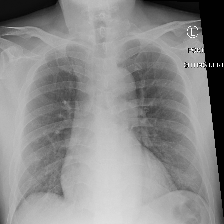

In [ ]:
import numpy as np
from keras.preprocessing import image
img1 =image.load_img('/content/drive/MyDrive/CovidDataset/Val/Covid/16654_1_1.png',target_size =(224,224))
img1



In [ ]:
img =image.img_to_array(img1)
img.shape

(224, 224, 3)

In [ ]:
img = img/255
img =np.expand_dims(img, axis =0)
img.shape

(1, 224, 224, 3)

In [ ]:
y_pred_img = model1.predict(img)
print(y_pred_img)


[[0.5019376  0.49806237]]


In [ ]:
print(y_pred_img[0][0])
print(y_pred_img[0][1])

0.5019376
0.49806237


In [ ]:
if y_pred_img[0][0] >= 0.5:
    prediction = 'covid'
else:
    prediction = 'normal'
print(prediction)

covid
